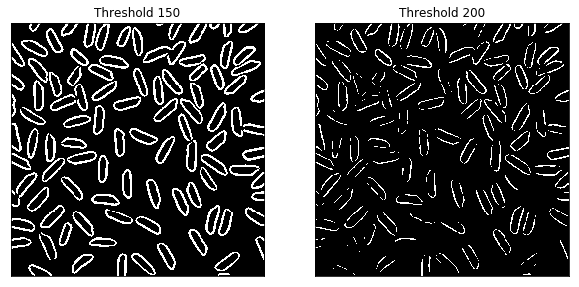

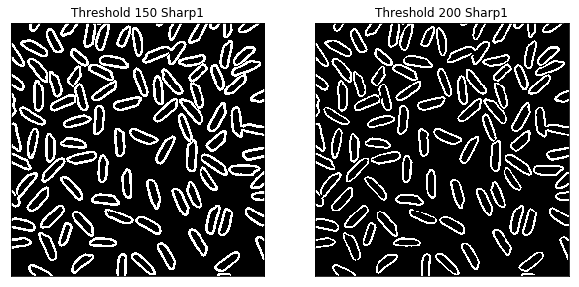

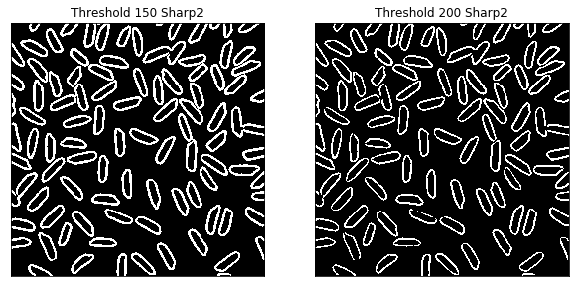

In [5]:
#1) Effect of sharpening on edge detection
import numpy as np
import matplotlib.pyplot as plt
import cv2

#reading images in grayscale and original
org_img = cv2.imread('C:/Users/Filip/Google Drive/McGillSchool/Semester 7/ECSE 415/Assignments/Assignment1/rice.png',cv2.IMREAD_GRAYSCALE)
org_img2 = cv2.imread('C:/Users/Filip/Google Drive/McGillSchool/Semester 7/ECSE 415/Assignments/Assignment1/rice.png')

#applying sobel edge detection on grayscale image and then applying both thresholds.
I_x = cv2.Sobel(org_img, cv2.CV_64F, 1, 0, ksize=3)
I_y = cv2.Sobel(org_img, cv2.CV_64F, 0, 1, ksize=3)
I_m = cv2.magnitude(I_x, I_y)
ret, img_thresh150 = cv2.threshold(I_m, 150, 255, cv2.THRESH_BINARY)
ret, img_thresh200 = cv2.threshold(I_m, 200, 255, cv2.THRESH_BINARY)

#applying box and gaussian filter on the original image
box = np.ones((5,5),np.float32)/(5*5)
bf_img = cv2.filter2D(org_img2, -1, box)
gf_img = cv2.GaussianBlur(org_img2,(5,5),np.sqrt(2))

#sharpening both filtered images and converting format of sharpened images
det1_img = np.subtract(org_img2,bf_img)
sharp1_img = np.add(org_img2, det1_img)
det2_img = np.subtract(org_img2,gf_img)
sharp2_img = np.add(org_img2, det2_img)
sharp1_img = cv2.cvtColor(sharp1_img, cv2.COLOR_BGR2GRAY)
sharp2_img = cv2.cvtColor(sharp2_img, cv2.COLOR_BGR2GRAY)

#applying sobel edge detection on sharpened image with box and applying both threshholds
I_x_sharp1 = cv2.Sobel(sharp1_img, cv2.CV_64F, 1, 0, ksize=3)
I_y_sharp1 = cv2.Sobel(sharp1_img, cv2.CV_64F, 0, 1, ksize=3)
I_m_sharp1 = cv2.magnitude(I_x_sharp1, I_y_sharp1)
ret, img_sharp1_thresh150 = cv2.threshold(I_m_sharp1, 150, 255, cv2.THRESH_BINARY)
ret, img_sharp1_thresh200 = cv2.threshold(I_m_sharp1, 200, 255, cv2.THRESH_BINARY)

#applying sobel edge detection on sharpened image with gaussian and applying both threshholds
I_x_sharp2 = cv2.Sobel(sharp2_img, cv2.CV_64F, 1, 0, ksize=3)
I_y_sharp2 = cv2.Sobel(sharp2_img, cv2.CV_64F, 0, 1, ksize=3)
I_m_sharp2 = cv2.magnitude(I_x_sharp2, I_y_sharp2)
ret, img_sharp2_thresh150 = cv2.threshold(I_m_sharp2, 150, 255, cv2.THRESH_BINARY)
ret, img_sharp2_thresh200 = cv2.threshold(I_m_sharp2, 200, 255, cv2.THRESH_BINARY)

#displaying images
plt.figure(figsize=(10, 10))
plt.subplot(121), plt.imshow(img_thresh150, cmap="gray"), plt.title("Threshold 150"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_thresh200, cmap="gray"), plt.title("Threshold 200"), plt.xticks([]), plt.yticks([])

plt.figure(figsize=(10, 10))
plt.subplot(121), plt.imshow(img_sharp1_thresh150, cmap="gray"), plt.title("Threshold 150 Sharp1"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_sharp1_thresh200, cmap="gray"), plt.title("Threshold 200 Sharp1"), plt.xticks([]), plt.yticks([])

plt.figure(figsize=(10, 10))
plt.subplot(121), plt.imshow(img_sharp2_thresh150, cmap="gray"), plt.title("Threshold 150 Sharp2"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_sharp2_thresh200, cmap="gray"), plt.title("Threshold 200 Sharp2"), plt.xticks([]), plt.yticks([])
plt.show()

1.3) Comment on the effectiveness of using sharpening prior to the edge detection. 

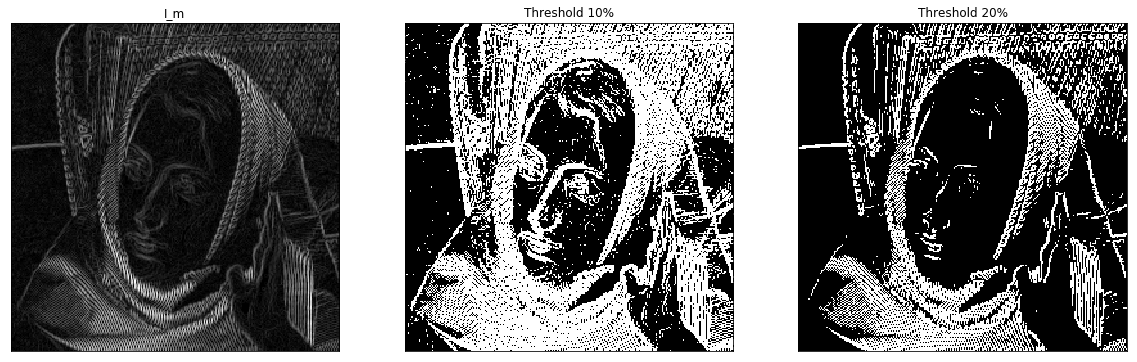

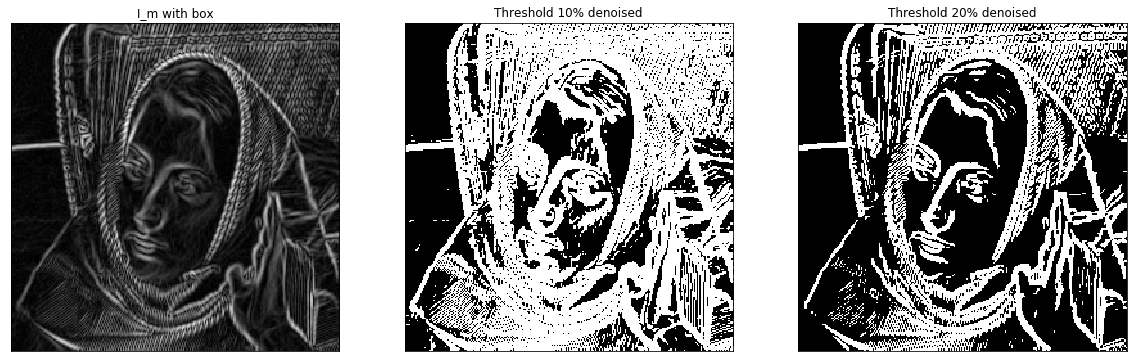

In [6]:
#2) Effect of denoising on edge detection

#reading woman image in grayscale and original
woman_img = cv2.imread('C:/Users/Filip/Google Drive/McGillSchool/Semester 7/ECSE 415/Assignments/Assignment1/woman.png', cv2.IMREAD_GRAYSCALE)
woman_img2 = cv2.imread('C:/Users/Filip/Google Drive/McGillSchool/Semester 7/ECSE 415/Assignments/Assignment1/woman.png')

#applying sobel edge detection on grayscale image
I_x_woman = cv2.Sobel(woman_img, cv2.CV_64F, 1, 0, ksize=3)
I_y_woman = cv2.Sobel(woman_img, cv2.CV_64F, 0, 1, ksize=3)
I_m_woman = cv2.magnitude(I_x_woman, I_y_woman)

#finding out maximum value
min_val, max_val, min_idx, max_idx = cv2.minMaxLoc(I_m_woman)

#applying both thresholds
ret, img_thresh10 = cv2.threshold(I_m_woman, max_val*0.1, max_val, cv2.THRESH_BINARY)
ret, img_thresh20 = cv2.threshold(I_m_woman, max_val*0.2, max_val, cv2.THRESH_BINARY)

#applying box filter on original image and converting to grayscale
box = np.ones((3,3),np.float32)/(3*3)
bf_img_woman = cv2.filter2D(woman_img2, -1, box)
bf_img_woman = cv2.cvtColor(bf_img_woman, cv2.COLOR_BGR2GRAY)

#applying sobel edge detection on box filtered image
I_x_box = cv2.Sobel(bf_img_woman, cv2.CV_64F, 1, 0, ksize=3)
I_y_box = cv2.Sobel(bf_img_woman, cv2.CV_64F, 0, 1, ksize=3)
I_m_box = cv2.magnitude(I_x_box, I_y_box)

#finding out maximum value
min_val2, max_val2, min_idx2, max_idx2 = cv2.minMaxLoc(I_m_box)

#applying both thresholds
ret, img_box_thresh10 = cv2.threshold(I_m_box, max_val2*0.1, max_val2, cv2.THRESH_BINARY)
ret, img_box_thresh20 = cv2.threshold(I_m_box, max_val2*0.2, max_val2, cv2.THRESH_BINARY)
   
#displaying images
plt.figure(figsize=(20, 20))
plt.subplot(131), plt.imshow(I_m_woman, cmap="gray"), plt.title("I_m"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(img_thresh10, cmap="gray"), plt.title("Threshold 10%"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(img_thresh20, cmap="gray"), plt.title("Threshold 20%"), plt.xticks([]), plt.yticks([])

plt.figure(figsize=(20, 20))
plt.subplot(131), plt.imshow(I_m_box, cmap="gray"), plt.title("I_m with box"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(img_box_thresh10, cmap="gray"), plt.title("Threshold 10% denoised"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(img_box_thresh20, cmap="gray"), plt.title("Threshold 20% denoised"), plt.xticks([]), plt.yticks([])
plt.show()

2.3) Comment on the effectiveness of using sharpening prior to the edge detection.
